In [67]:
import seaborn as sns
import pandas as pd

In [68]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15)) 

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [69]:
resultsdf = pd.read_csv("out(7.16).csv")
resultsdf = resultsdf.dropna()

In [70]:
sns.set_theme()

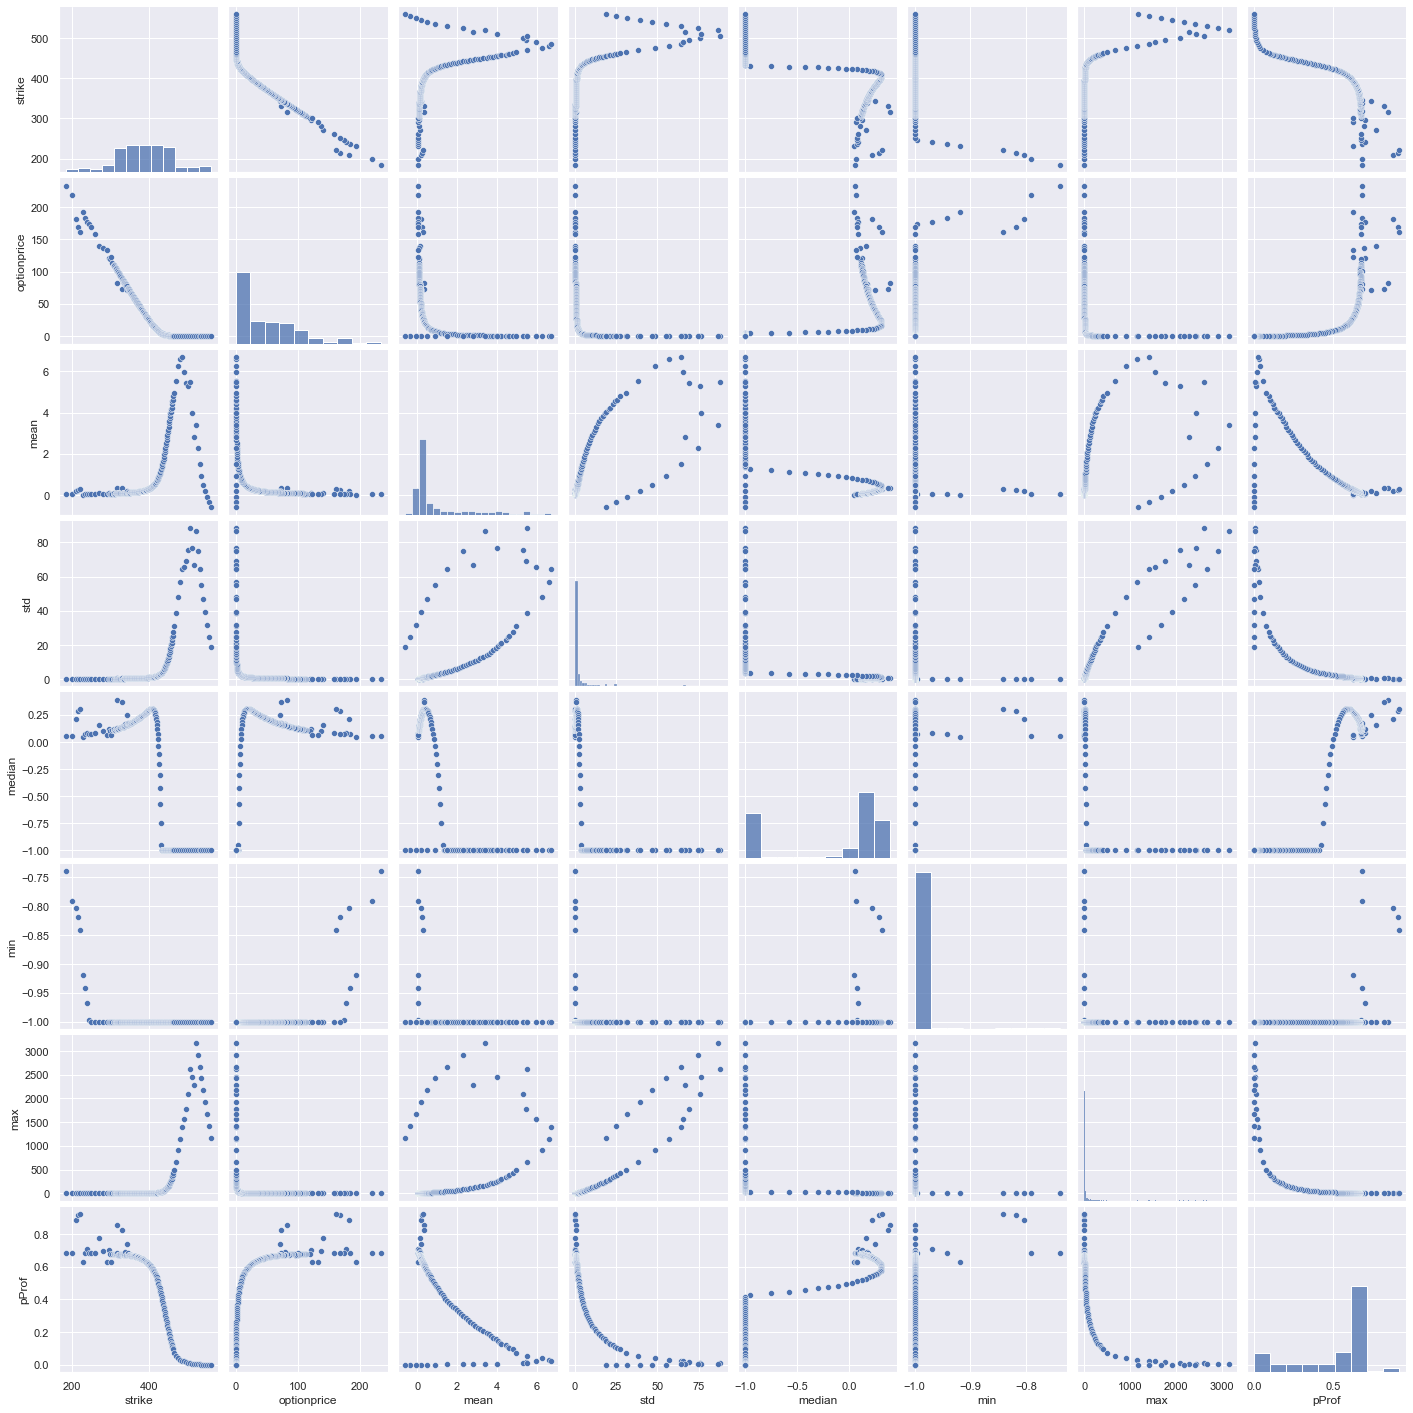

In [71]:
sns_plot = sns.pairplot(resultsdf)

In [72]:
sns_plot.savefig("output.png")

In [73]:
from ModelBox import fit_all

In [74]:
# xname, yname = "strike", "pProf"
# xname, yname = "max", "pProf"
# xname, yname = "strike", "max"
xname, yname = "pProf", "mean"

x, y = resultsdf[xname].values, resultsdf[yname].values
fits = fit_all(x, y)
f_xs = np.linspace(min(x), max(x), num=101)
fits.sort(key=lambda x: x[1])
data = map(lambda x: [type(x[0]).__name__,x[1]], fits)

Attempting fit Linear
Attempting fit Quadratic
Attempting fit Cubic
Attempting fit Poly11
Attempting fit Poly22
Attempting fit Poly33
Attempting fit MichaelisMenten1
Attempting fit MichaelisMenten2
Attempting fit MichaelisMenten3
Attempting fit Reciprocal
Attempting fit BleasdaleNelder
Attempting fit FarazdaghiHarris
Attempting fit Holliday
Attempting fit Monomolecular
Attempting fit Logistic3
Attempting fit Logistic4
Attempting fit Gompertz
Attempting fit Weibull
Attempting fit MorganMercerFloding
Attempting fit Richards
Attempting fit Logarithmic
Attempting fit Power
Fit didn't converge Optimal parameters not found: Number of calls to function has reached maxfev = 600.
Attempting fit PowerPower
Attempting fit SumExponentials
Attempting fit ExponentialType1
Attempting fit ExponentialType2
Fit didn't converge Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Attempting fit Normal
Fit didn't converge Optimal parameters not found: Number of calls to fun

C:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\maxim\Desktop\js\opt\ModelBox.py:352: RuntimeWarning: invalid value encountered in power
  return np.nan_to_num(((a*x)+b)**(-1/c))
c:\Users\maxim\Desktop\js\opt\ModelBox.py:352: RuntimeWarning: overflow encountered in power
  return np.nan_to_num(((a*x)+b)**(-1/c))
c:\Users\maxim\Desktop\js\opt\ModelBox.py:498: RuntimeWarning: invalid value encountered in power
  return np.nan_to_num(d + ((a-d)/(1+((x/c)**b))))
c:\Users\maxim\Desktop\js\opt\ModelBox.py:594: RuntimeWarning: divide by zero encountered in long_scalars
  return a * ((1+((b-1)*np.exp(-c*(x-d))))**(1/(1-b)))
c:\Users\maxim\Desktop\js\opt\ModelBox.py:594: RuntimeWarning: divide by zero encountered in double_scalars
  return a * ((1+((b-1)*np.exp(-c*(x-d))))**(1/(1-b)))
c:\Users\

In [75]:
df = pd.DataFrame(data, columns=["Name", "Err"])
df = df.dropna()
df = df.sort_values(by=['Err'])
df

,Name,Err
0,Poly33,0.027452
1,Poly22,0.031353
2,QuadraticLinear,0.044764
3,ExponentialType1,0.174112
4,LinearQuadratic,0.579810
5,Holliday,0.590009
6,Cubic,0.699620
7,Lognormal,0.713215
8,MorganMercerFloding,0.716720
9,Logistic4,0.716720


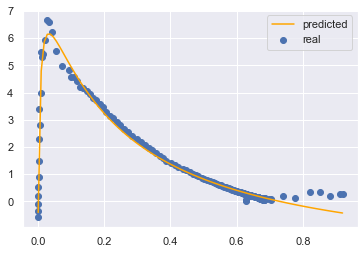

In [81]:
import matplotlib.pyplot as plt
plt.scatter(x, y, label="real")
# plt.plot(x, fits[2][0].predict(x), label="predicted", color="orange")
plt.plot(f_xs, fits[2][0].predict(f_xs), label="predicted", color="orange")
plt.legend()
plt.show()

In [77]:
# plt.scatter(x, y, label="real")
# for i in range(len(fits)):
#     model = fits[i][0]
#     plt.plot(x, model.predict(x), label=f"predicted[{i}]")
# # plt.legend()
# plt.show()

In [78]:
fits[0][0].toJSON()

'{"model": "Poly33", "instance": [false], "parameters": [2192.2879821202564, -3345.0759027307363, 1270.2039927617707, -1.46930594635647, -920.176139144964, 513.1059659333697, 140.26715099236023, 0.8232469745265967]}'

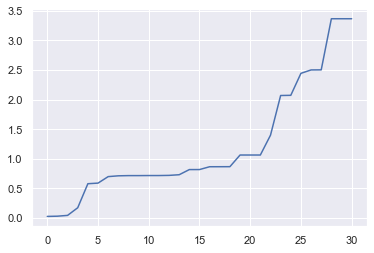

In [79]:
plt.plot(df["Err"].values)

(array([3., 1., 0., 0., 1., 1., 8., 5., 0., 3., 0., 0., 1., 0., 0., 0., 0.,
        0., 2., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 3.]),
 array([0.02745164, 0.13875203, 0.25005242, 0.36135281, 0.4726532 ,
        0.58395359, 0.69525398, 0.80655437, 0.91785476, 1.02915515,
        1.14045554, 1.25175592, 1.36305631, 1.4743567 , 1.58565709,
        1.69695748, 1.80825787, 1.91955826, 2.03085865, 2.14215904,
        2.25345943, 2.36475982, 2.47606021, 2.58736059, 2.69866098,
        2.80996137, 2.92126176, 3.03256215, 3.14386254, 3.25516293,
        3.36646332]),
 <BarContainer object of 30 artists>)

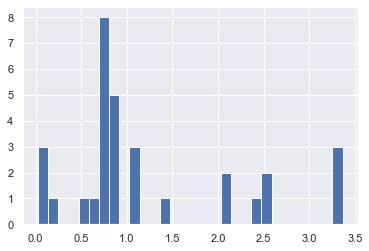

In [80]:
import numpy as np
err = df["Err"].values
plt.hist(err[np.isfinite(err)], bins=30)